In [1]:
%load_ext autoreload
%autoreload 2

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
from HSIC.HSIC import hsic_gam
from sklearn.linear_model import LinearRegression


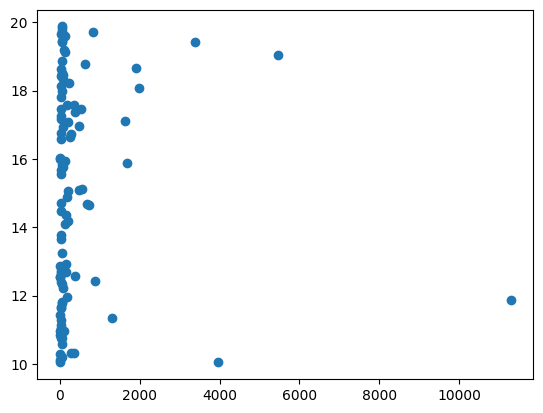

In [361]:
lenX = 100
X1 = 2*np.random.rand(lenX) + 0.1
X2 = 10*np.random.rand(lenX) + 5.0
X3 = 2*np.random.rand(lenX) + 0.5
X4 = 10*np.random.rand(lenX) + 10.0

Y = (2.5*X2/X1**2)*(X4/np.exp(X3))
df_log = pd.DataFrame(
    np.array([np.log(X1), np.log(X2), np.log(X3), np.log(X4), np.log(Y)]).T, 
    columns=['X1', 'X2', 'X3', 'X4', 'Y']
)
df_raw = pd.DataFrame(
    np.array([X1, X2, X3, X4, Y]).T, 
    columns=['X1', 'X2', 'X3', 'X4', 'Y']
)
plt.scatter(df_raw['Y'], df_raw['X4'])

[[-2.01184872  0.98688373 -1.29433741  0.9656384 ]]


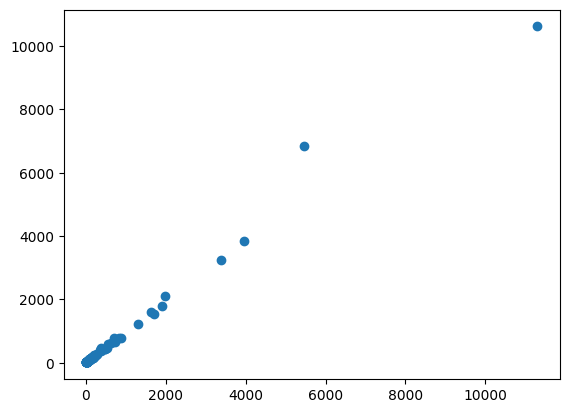

In [362]:
lr_log = LinearRegression()
lr_log.fit(
    df_log[['X1', 'X2', 'X3', 'X4']], 
    df_log[['Y']]
)
print(lr_log.coef_)
plt.scatter(df_raw['Y'], np.exp(lr_log.predict(df_log[['X1', 'X2', 'X3', 'X4']])))

[[-1104.53748658    74.37830774  -626.56031608   -27.65396556]]


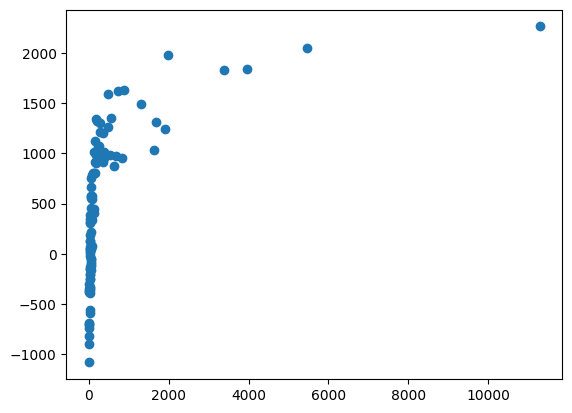

In [363]:
lr_raw = LinearRegression()
lr_raw.fit(
    df_raw[['X1', 'X2', 'X3', 'X4']], 
    df_raw[['Y']]
)
print(lr_raw.coef_)
plt.scatter(df_raw['Y'], lr_raw.predict(df_raw[['X1', 'X2', 'X3', 'X4']]))

In [364]:
pred_log = np.exp(lr_log.predict(df_log[['X1', 'X2', 'X3', 'X4']])).reshape(-1)
pred_raw = lr_raw.predict(df_raw[['X1', 'X2', 'X3', 'X4']]).reshape(-1)

#print(fX, df_raw['Y'].values)

print('Peason(log): ', np.corrcoef(pred_log, df_raw['Y'].values)[0, 1])
print('Peason(raw): ', np.corrcoef(pred_raw, df_raw['Y'].values)[0, 1])
mine1 = MINE()
mine1.compute_score(pred_log, df_raw['Y'].values)
print('MIC: '+ str(mine1.mic()))
mine2 = MINE()
mine2.compute_score(pred_raw, df_raw['Y'].values)
print('MIC: '+ str(mine2.mic()))
testStat, thresh = hsic_gam(df_raw[['X1', 'X2', 'X3', 'X4']].values, df_raw[['Y']].values)
print('HSIC: '+ str(testStat / thresh), testStat, thresh)

Peason(log):  0.9932559554512926
Peason(raw):  0.5430497070610789
MIC: 1.0000000000000009
MIC: 1.0000000000000009
HSIC: 3.1300167799071668 0.9597300470010214 0.3066213744162375
